In [1]:
import  numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin

First, I run K-Means clustering on the geoData coordinate dataset. This enables us to collapse a wide range of locations into a handful of different categories.

The closer the silhouette score is to 1, the better the clusters.

For 3 clusters the silhouette score is: 0.908


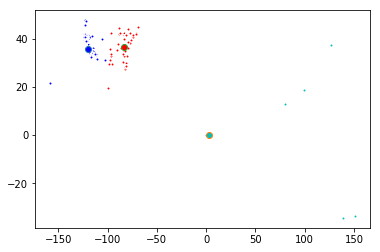

In [19]:
geo = pd.read_csv("geoData.csv")

# will classify only by latitude and longitude data, so drop the others
geo.drop(['school_code', 'countyMatch', 'isSchool'],inplace=True,axis=1) 

# convert geo dataframe to np array so it plays nice with scikit
dat_data = geo.values
n_clusters = 3

km = KMeans(n_clusters) 
result = km.fit_predict(dat_data)

centroids = km.cluster_centers_ #get the center points of each cluster
dat_label = pairwise_distances_argmin(dat_data, centroids)
colors = ['b', 'c', 'r'] #colors for our three clusters

silhouette_avg = silhouette_score(dat_data, result)
print("For", n_clusters, "clusters the silhouette score is: {:0.3f}".format(silhouette_avg))

for k, col in zip(range(n_clusters), colors):
    mems = dat_label == k
    cent = centroids[k]
    plt.plot(dat_data[mems, 0], dat_data[mems,1], 'w', markerfacecolor=col, marker='.')
    plt.plot(cent[0], cent[1], 'o', markerfacecolor=col, markersize=6)

plt.show()

I picked 3 on a whim, but a silhouette score of 0.908 is pretty darn good. The graph shows us two distinct clusters (red and blue), with a smattering of outliers being grouped into green.

Closer analysis of these outliers, to determine if they should be disgarded or merely considered separately, is advised.

We drop all datapoints with extreme longitudinal outliers (longitude > -10) and try again.

For 2 clusters the silhouette score is: 0.907


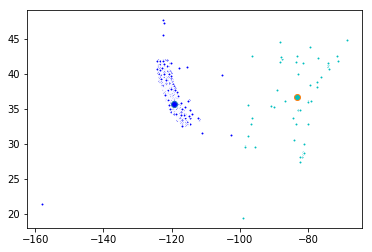

In [30]:
trimGeo = geo.drop(geo[geo['longitude'] > -10].index)

# convert geo dataframe to np array so it plays nice with scikit
dat_data = trimGeo.values
n_clusters = 2

km = KMeans(n_clusters) 
result = km.fit_predict(dat_data)

centroids = km.cluster_centers_ #get the center points of each cluster
dat_label = pairwise_distances_argmin(dat_data, centroids)
colors = ['b', 'c', 'r', 'm'] #colors for our clusters

silhouette_avg = silhouette_score(dat_data, result)
print("For", n_clusters, "clusters the silhouette score is: {:0.3f}".format(silhouette_avg))

for k, col in zip(range(n_clusters), colors):
    mems = dat_label == k
    cent = centroids[k]
    plt.plot(dat_data[mems, 0], dat_data[mems,1], 'w', markerfacecolor=col, marker='.')
    plt.plot(cent[0], cent[1], 'o', markerfacecolor=col, markersize=6)

plt.show()